In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('datafiles/world-happiness-report/2015.csv')

In [3]:
raw_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
raw_data.columns = ['country','region','happiness-rank','happiness-score','se','economy','family','health','freedom','trust','generosity','dystopia']

In [7]:
region_dummies = pd.get_dummies(raw_data['region'])
df = pd.concat([raw_data,region_dummies],axis=1)

,country,region,happiness-rank,happiness-score,se,economy,family,health,freedom,trust,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0,0,0,0,0,0,0,0,0,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0,0,0,0,0,0,0,0,0,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0,0,0,0,0,0,0,0,0,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0,0,0,0,0,0,0,0,0,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0,0,0,0,0,1,0,0,0,0


In [10]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
Y = df['happiness-score']
X = df.loc[:,'economy':'dystopia']

regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.0001014   0.99997035  0.99988261  0.99969531  0.99991914  1.00006126
  1.00003038]

Intercept: 
 6.40485914616e-05

R-squared:
0.999999942008


In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([ 0.99999739,  0.99999763,  0.99999807,  0.99997531,  0.99999686,
        0.99998796,  0.99998144,  0.99998668,  0.99999578,  0.99999947])

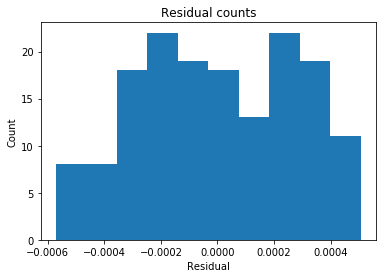

In [11]:
# Testing assumption of multivariate normality - residuals should be normally distributed.

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['happiness-score']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

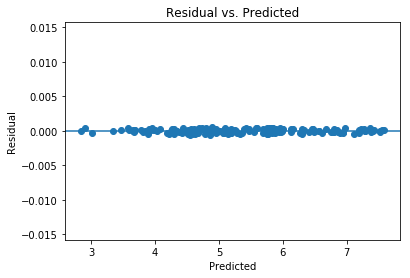

In [12]:
# Testing assumption of homoscedasticity - distribution of error termsshould be consistent for all predicted values

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

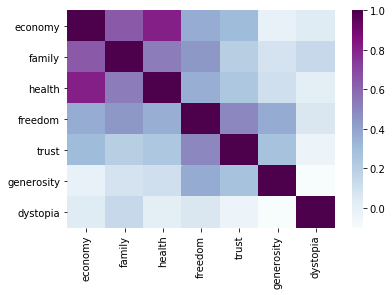

In [16]:
# Assumption of low multicollinearity - correlations among features should be low

corr_map = X.corr()
sns.heatmap(corr_map, cmap='BuPu')

In [18]:
# Importing 2016 data to test model
test_data = pd.read_csv('datafiles/world-happiness-report/2016.csv')
test_data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [19]:
test_data.columns = ['country','region','happiness-rank','happiness-score','low-ci','upper-ci','economy','family',
                     'health','freedom','trust','generosity','dystopia']

In [20]:
X_test = test_data.loc[:, 'economy':'dystopia']
Y_test = test_data['happiness-score']

In [22]:
test_pred = regr.predict(X_test)

print(regr.score(X_test, Y_test))

0.999999927638
